In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [225]:
df = pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\Python_youtube_Analysis-master\\video_id_info.csv",on_bad_lines='skip')

In [226]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691400 non-null  object
 1   comment_text  691374 non-null  object
 2   likes         691400 non-null  object
 3   replies       691400 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


In [228]:
df.isnull().sum() # finding the null values in our data

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [229]:
df.dropna(inplace = True)

In [230]:
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

# 2. Perform Sentimental Analysis

In [231]:
# for sentimental analysis we use textblob module which give the polarity between 1 to -1 based on comment_text.

# for example,
# 1)This video is quite helpful-->Positive sentiment [0,1] more it will close to 1 it will positve sentiment 
# 2)Uable to understand the topic -->Negative sentiment[-1]
# 3) I'm attending the lecture this afternoon.-->Neutral sentiment[0]

#The polarity range refers to the scale used in sentiment analysis to measure the degree of positivity or negativity in text, typically ranging from -1 to 1

In [232]:
!pip install textblob
import sys
!{sys.executable} -m pip install textblob

In [233]:
from textblob import TextBlob as tb

In [234]:
df.shape

(691374, 4)

In [235]:
tb("Logan paul it's your big day !!!!!!")

TextBlob("Logan paul it's your big day !!!!!!")

In [236]:
tb("Logan paul it's your big day !!!!!!").sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

In [237]:
tb("Logan paul it's your big day !!!!!!").sentiment.polarity # we use "sentitment.polarity " to identified the polarity of text

0.0

In [238]:
# to identify the polairty of each comment we use "for loop " for iterating over each comment.
# here we also use an exception handling if during iterating any special or understandable words occur then it simply append "0".

In [239]:
polarity_comment_text = []

for comment in df["comment_text"]:

    try:
        each_polarity=tb(comment).sentiment.polarity
        polarity_comment_text.append(each_polarity)
        
    except:
        polarity_comment_text.append(0)
    

In [240]:
len(polarity_comment_text)

691374

In [241]:
df["polarity"] = polarity_comment_text # now we simply add this polarity in our dataframe

In [242]:
df.head(10)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


# 3. WORDCLOUD ANALYSIS

In [243]:
# we are using this package to display the most common positive words and  most common negative words available in comment_text with the help of polaritis .

In [244]:
positive_polarity = df[df["polarity"]==1]
positive_polarity                               # here we filter out the  most common positive comment_text.

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
691373,EoejGgUNmVU,Perfect. Every version,0,0,1.0
691383,EoejGgUNmVU,Me encantaaaaa <3,0,0,1.0
691388,EoejGgUNmVU,Best song ever 🤘,0,0,1.0
691389,EoejGgUNmVU,excellent performance,0,0,1.0


In [245]:
negative_polarity = df[df["polarity"]==-1]
negative_polarity                               # here we filter out the  most common negative comment_text.

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0
...,...,...,...,...,...
690788,Hlt3rA-oDao,Like Kelly she evil,0,0,-1.0
690865,Ni5Uc-DdMqk,R U FUCKING KIDDING ME?!?!?!?!,11,1,-1.0
691073,4kmSATD25iY,This is horribly offensive please report,0,0,-1.0
691180,xlu6i6lT_vk,Sink holes looks terrifying sinkholes sink you...,0,0,-1.0


In [246]:
!pip install WordCloud

In [247]:
from wordcloud import WordCloud,STOPWORDS 

#Stopwords are common words like "the," "is," and "and" that are often removed from text during analysis because they don't carry significant meaning.

In [248]:
set(STOPWORDS) # it remove the following word from our comment_text.

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [249]:
df["comment_text"]

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [250]:
type(df["comment_text"])

pandas.core.series.Series

In [251]:
one_line_positive_comments = " ".join(positive_polarity["comment_text"])
# wordcloud function take a string so we need to first convert that "comment_text" frame into a single strings.

In [252]:
word_cloud = WordCloud(stopwords = set(STOPWORDS)).generate(one_line_positive_comments) 
#This line of code creates a word cloud from the text data in `total_comments_positive`, using a predefined set of stopwords to filter out common words .

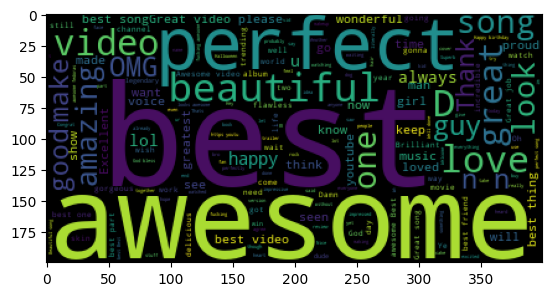

In [253]:
plt.imshow(word_cloud)
plt.show()
#The imshow() function in matplotlib is used to display images, and in this case, it's used to display the word cloud generated by the WordCloud library.

## Conclusion-->> positive Users are emphasizing more on best , awesome , perfect , amazing , look , happy etc..

In [254]:
one_line_negative_comments = " ".join(negative_polarity["comment_text"])
# wordcloud function take a string so we need to first convert that "comment_text" frame into a single strings.

In [255]:
word_cloud1 = WordCloud(stopwords = set(STOPWORDS)).generate(one_line_negative_comments)
#This line of code creates a word cloud from the text data in `total_comments_positive`, using a predefined set of stopwords to filter out common words .

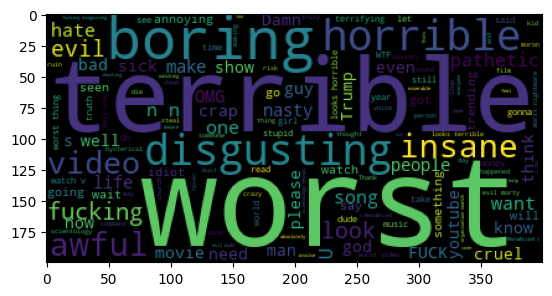

In [256]:
plt.imshow(word_cloud1)
plt.show()
#The imshow() function in matplotlib is used to display images, and in this case, it's used to display the word cloud generated by the WordCloud library.

## Conclusion-->> Negative Users are emphasizing more on Terrible , worst ,horrible ,boring , disgusting etc..

# 4. EMOJI ANALYSIS

In [257]:
# here we are going to find out which emoji occur most in our comment_text columns so first we install the latest emoji library

In [258]:
! pip install emoji==2.10.1

In [259]:
import emoji

In [260]:
df["comment_text"]

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [261]:
comment = "trending 😍" 

In [262]:
[i for i in comment if i in emoji.EMOJI_DATA] # emoji.EMOJI_DATA is an collection of emojis.

['😍']

In [263]:
# so first we are going to create an empty list and  then appending the emoji inside it.

In [264]:
all_emoji_list = []
for i in df["comment_text"].dropna():
    for j in i:
        if j in emoji.EMOJI_DATA: # emoji.EMOJI_DATA is an collection of emojis.
            all_emoji_list.append(j)
all_emoji_list

['‼',
 '‼',
 '‼',
 '😉',
 '😭',
 '👍',
 '🏻',
 '❤',
 '😍',
 '💋',
 '💙',
 '👍',
 '👈',
 '😂',
 '🔥',
 '😂',
 '😂',
 '😂',
 '😂',
 '👻',
 '❤',
 '😂',
 '❤',
 '💎',
 '😆',
 '😆',
 '😆',
 '😆',
 '😆',
 '😆',
 '😁',
 '😁',
 '😁',
 '😁',
 '😁',
 '😁',
 '😁',
 '😂',
 '😂',
 '😂',
 '😂',
 '😭',
 '😒',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '😊',
 '❤',
 '👈',
 '😂',
 '😂',
 '👌',
 '👌',
 '🤔',
 '👈',
 '😂',
 '😂',
 '😁',
 '💔',
 '😂',
 '👎',
 '👎',
 '👎',
 '👎',
 '👎',
 '🍎',
 '😤',
 '😂',
 '😂',
 '😂',
 '😂',
 '👈',
 '😭',
 '😭',
 '😭',
 '😢',
 '😢',
 '😢',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '💋',
 '💋',
 '👫',
 '💘',
 '😻',
 '💋',
 '💋',
 '💖',
 '💖',
 '💖',
 '💖'

In [265]:
# Now we have to compute frequencies of each & every emoji

from collections import Counter # collection is an package

In [266]:
count_emo_list = Counter(all_emoji_list).most_common(10) # counter is an Function which give the count of each emoji in the from of dictionary and here 
count_emo_list                                           # we used most_common(10) means it give 10 most common emojis.

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [267]:
# now From above a list of tuples we have to seprate the emoji and there counts  and with the help of seaborn we display the graph of it.

In [268]:
only_emoji = [count_emo_list[i][0] for i in range(10)]
only_emoji
only_count = [count_emo_list[i][1] for i in range(10)]
only_count

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

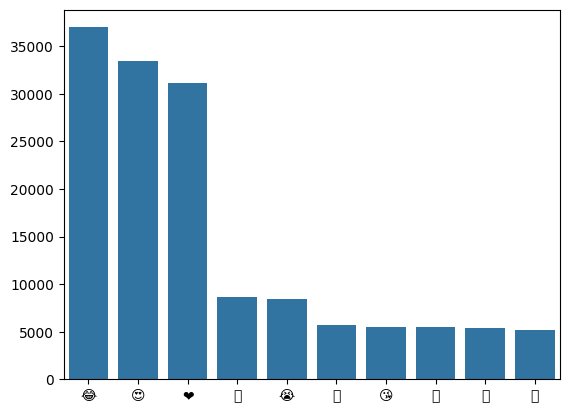

In [269]:
ax =sns.barplot(x= only_emoji, y= only_count)
plt.show()

## Conclusions : Majority of the customers are happy as most of them are using emojis like: funny , love , heart , outstanding..

# 5. COLLECT ENTIRE DATA OF YOUTUBE

In [270]:
import os

# here with the help of os module we are retrivng all the file name from directory .

In [271]:
files = os.listdir(r'C:\Users\HP\OneDrive\Desktop\Python_youtube_Analysis-master\YT_additional_data')

In [272]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'README.md',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [273]:
files_csv= [i for i in files if ".csv" in i ] # extracting .CSV files only.
json_file = [i for i in files if ".json" in i ] # extracting .jeson files only.
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [274]:
# now we are creating an datafrome by concatenating each .csv file .

full_df = pd.DataFrame()  
path = r'C:\Users\HP\OneDrive\Desktop\Python_youtube_Analysis-master\YT_additional_data'
for file in files_csv:
    current_df = pd.read_csv(path+'/'+file, encoding='iso-8859-1')
    full_df = pd.concat([full_df, current_df], ignore_index=True)


In [275]:
full_df.shape

(375942, 16)

In [276]:
full_df.duplicated() #True will represent the duplicate rows and  False represent the uniques rows.

0         False
1         False
2         False
3         False
4         False
          ...  
375937     True
375938    False
375939    False
375940    False
375941    False
Length: 375942, dtype: bool

In [277]:
full_df.drop_duplicates(inplace =True) # droping duplicate values from new created data dataframe

In [278]:
full_df.shape

(339525, 16)

In [279]:
full_df['category_id'].unique() 

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [280]:
json_df = pd.read_json(r'C:\Users\HP\OneDrive\Desktop\Python_youtube_Analysis-master\YT_additional_data/US_category_id.json')

In [281]:
json_df['items'][0]["id"]
item['snippet']['title']

'Trailers'

In [282]:
# from these json file from each item i want id, snippet,title and we are going to appemd it in an empty dictionary.

In [283]:
title_id = {}

for item in json_df['items']:     #values here return the array representation 
    ## cat_dict[key] = value (Syntax to insert key:value in dictionary)
    title_id[int(item['id'])] = item['snippet']['title'] # snippet here is the sub dict so we have to write this way  ['snippet']['title']

In [284]:
title_id

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [285]:
full_df["category_name"]=full_df["category_id"].map(title_id) 
# these statment create's an new column in full_df by looking up the value of newly created dictionary with category_id in full_df with the help of map fuction.

In [286]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music


# 6. MOST LIEKE,DISLIKE AND COMMENTED CATEGORY.

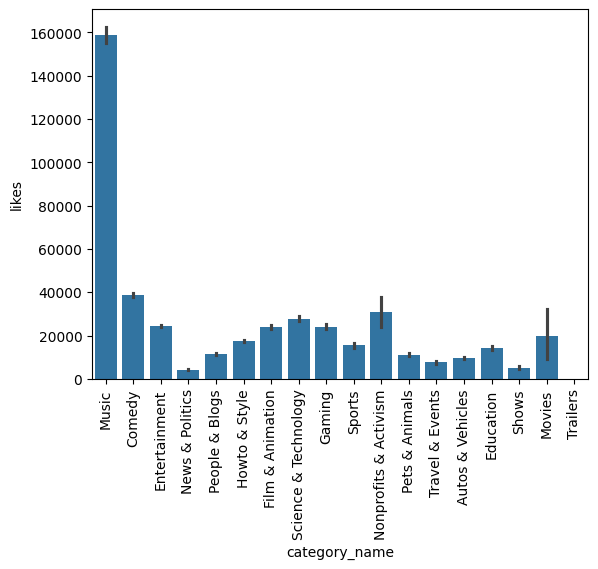

In [287]:

sns.barplot(x='category_name' , y='likes' , data=full_df)
plt.xticks(rotation='vertical')
plt.show()

## From above ghraph we can see that "Music" category has maximum likes .

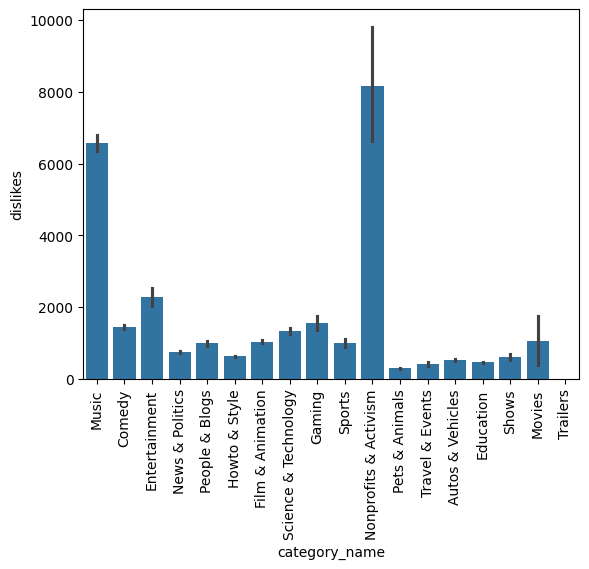

In [288]:
sns.barplot(x='category_name' , y='dislikes' , data=full_df)
plt.xticks(rotation='vertical')
plt.show()

## From above ghraph we can see that "Non-profits & Activism" and "Music" category has maximum dislikes .

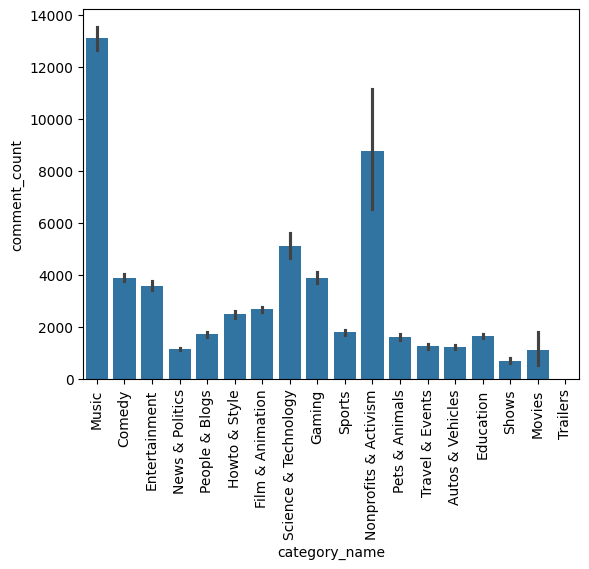

In [289]:
sns.barplot(x='category_name' , y='comment_count' , data=full_df)
plt.xticks(rotation='vertical')
plt.show()

## Mejority of comments also occur in thses "Music" and "Non-profits & Activism" category .

# 7. Analysing relationship between views & likes

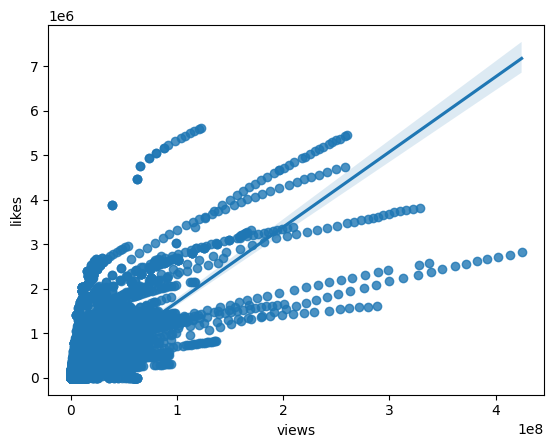

In [303]:
#using Regression plot
#regression plot is nothing but it is the combination of a scatter plot + a regression kine on top of that
sns.regplot(x='views' , y='likes' , data = full_df)
plt.show()

## From above graph we can see that as the views of video increase the like are also increase.

# 8. Which channels have the largest number of trending Videos ?

In [295]:
trend_video = full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index().head(10) 
trend_video


,channel_title,0
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
5,PewDiePie,511
6,The Tonight Show Starring Jimmy Fallon,509
7,CNN,500
8,The Late Late Show with James Corden,453
9,ESPN,452


In [296]:
trend_video.rename(columns={0:"Video_Count"},inplace = True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'The Late Show with Stephen Colbert'),
  Text(1, 0, 'WWE'),
  Text(2, 0, 'Late Night with Seth Meyers'),
  Text(3, 0, 'TheEllenShow'),
  Text(4, 0, 'Jimmy Kimmel Live'),
  Text(5, 0, 'PewDiePie'),
  Text(6, 0, 'The Tonight Show Starring Jimmy Fallon'),
  Text(7, 0, 'CNN'),
  Text(8, 0, 'The Late Late Show with James Corden'),
  Text(9, 0, 'ESPN')])

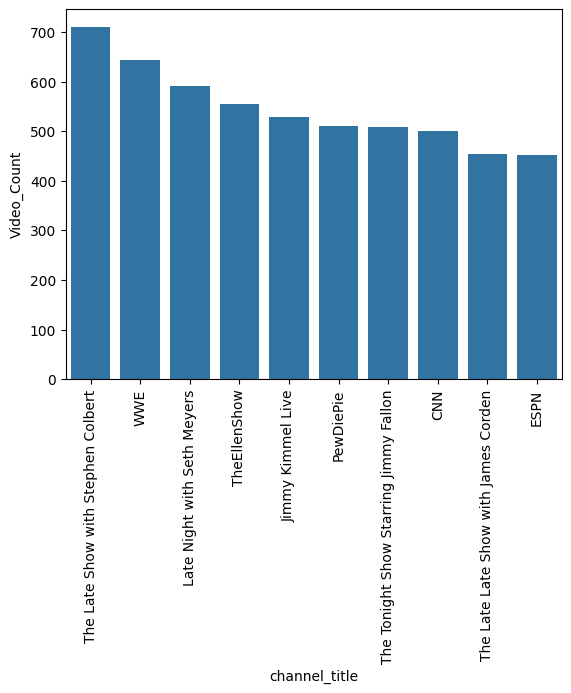

In [300]:
sns.barplot(x = trend_video["channel_title"],y = trend_video["Video_Count"])
plt.xticks(rotation='vertical')

## From above graph we can see  that top 10 trending videos are "The Late show with stephen Colbert" , "WWE" , "Late Night with Seth Meyers" , "TheEllenShow" etc .